# Problem Set 3

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

from functions import gini


from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

#### Question 1

**Part a**

In [42]:
np.random.seed(68) 
x2 = np.random.normal(0, 1, 100)

In [67]:
T=10000
N=100  #Sample size

# Parameters from the equation
beta_0 = 2   
beta_1 = 0.5


# Generate data
x2 = np.random.normal(0, 1, N)
error = np.random.normal(0, 5, N)
y = 2 + 0.5*x2 + error  

# Prepare the regressor matrix with intercept
X = sm.add_constant(x2)

# Fit OLS model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.451
Date:                Mon, 13 Oct 2025   Prob (F-statistic):              0.121
Time:                        21:22:20   Log-Likelihood:                -311.32
No. Observations:                 100   AIC:                             626.6
Df Residuals:                      98   BIC:                             631.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2763      0.552      4.127      0.0

**Part b**

In [65]:

sd = 5
beta_est = np.empty((T, 2))

for t in range(T):
    x = np.random.normal(0, 1, N)      #explanatory variable
    e = np.random.normal(0, sd, N)  #error term
    y = beta_0 + beta_1 * x + e

    
    X = sm.add_constant(x)               # design matrix [1, x], so it contains all explanatory variables
    res = sm.OLS(y, X).fit()             # OLS estimate
    beta_est[t, :] = res.params          # stores the estimates of each regression

print(beta_est[:5])
    


[[0.78419974 0.22521427]
 [2.11648326 0.44447035]
 [2.0145713  0.82179544]
 [1.53212178 1.26355806]
 [1.85148016 0.95994917]]


In [63]:
print(res.params)

[ 3.36904158 -0.13814295]


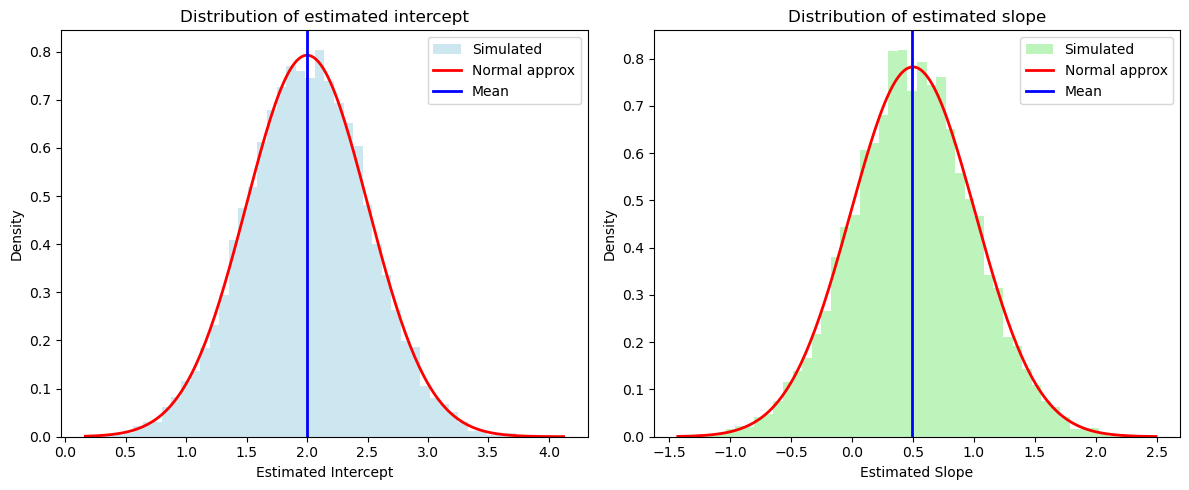

In [85]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# beta_1 distribution diagram

xvals0 = np.linspace(beta_est[:,0].min(), beta_est[:,0].max(), 200)
axs[0].hist(beta_est[:,0], bins=50, density=True, alpha=0.6, color='lightblue', label='Simulated BY MC')
axs[0].plot(xvals0, norm.pdf(xvals0, loc=beta_0, scale=np.sqrt(var_beta[0])), 'r', lw=2, label='Normal approx')
axs[0].axvline(mean_beta[0], color='blue', lw=2, label='Mean')
axs[0].set_title("Distribution of estimated intercept")
axs[0].set_xlabel("Estimated Intercept")
axs[0].set_ylabel("Density")
axs[0].legend()


# beta_1 distribution diagram

xvals1 = np.linspace(beta_est[:,1].min(), beta_est[:,1].max(), 200)
axs[1].hist(beta_est[:,1], bins=50, density=True, alpha=0.6, color='lightgreen', label='Simulated by MC')
axs[1].plot(xvals1, norm.pdf(xvals1, loc=beta_1, scale=np.sqrt(var_beta[1])), 'r', lw=2, label='Normal approx')
axs[1].axvline(mean_beta[1], color='blue', lw=2, label='Mean')
axs[1].set_title("Distribution of estimated slope")
axs[1].set_xlabel("Estimated Slope")
axs[1].set_ylabel("Density")
axs[1].legend()

plt.tight_layout()
plt.show()

In [61]:
mean_beta = beta_est.mean(axis=0)  # axis=0 ensures that 
var_beta = beta_est.var(axis=0, ddof=1) # degress of freedom = 1 because we are using a sample

print(f"Mean of estimated betas: intercept {mean_beta[0]:.4f}, slope {mean_beta[1]:.4f}")
print(f"Variance of estimated betas: {var_beta[0]:.4f} {var_beta[0]:.4f}")

Mean of estimated betas: intercept 1.9990, slope 0.4954
Variance of estimated betas: 0.2533 0.2533


The distributions shown are normal distributions. The mean and variance of the estimated parameters are as follows:

| |E(βˆOLS) | Var(βˆOLS) |
|--------|-----|----------|
|Intercept| 1.9990 | 0.2533 |
|Slope | 0.49554 | 0.2533 |

**Part c**

In [68]:
N=1000  # New sample size

# Parameters from the equation
beta_0 = 2   
beta_1 = 0.5

# Generate data
x2 = np.random.normal(0, 1, N)
error = np.random.normal(0, 5, N)
y = 2 + 0.5*x2 + error  

# Prepare the regressor matrix with intercept
X = sm.add_constant(x2)

# Fit OLS model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     8.058
Date:                Mon, 13 Oct 2025   Prob (F-statistic):            0.00462
Time:                        21:24:04   Log-Likelihood:                -3048.9
No. Observations:                1000   AIC:                             6102.
Df Residuals:                     998   BIC:                             6112.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9870      0.162     12.290      0.0

As N grows the estimates for the intercept and the slope get closer to 2 and 0.5. If rounded to 1 decimal point they would be correct for N=1000 but this is not the case for N=100. The standard errors for each variable are also a lot lower 

-------------------------Show formula of the distribution of the est betas--------------------------

#### Question 2

**Part a**

In [86]:
T=50
def ar_1_sim(T,rho,a=0, sd_e=5):
    ''' 
    simulates for T periods an AR(1) process of the following form:
                y_t+1 = a + rho*y_t + e_t
                where e_t ~ N (0,25)
    '''
    y = np.empty((T))
    y[0] = 0
    for i in range(1,T):
        e = np.random.normal(0,sd_e) 
        y[i] = a + rho*y[i-1] + e
      
    return y



y = ar_1_sim(T, rho=0.95)
print(y)

[  0.          -3.16156821 -11.75890598 -11.5257396    4.19394637
   8.79974627  12.78589701  13.87765792  16.03824331  20.32999301
  18.18366969  22.43833433  13.9923057   11.34535077  14.3160879
  10.3949566    5.67406716  -1.37015985  -2.06344588  -2.32064582
  -3.44774894  -2.32417906  -0.91457293  -1.87760776  -1.80705348
   4.62591773   0.3119898   -0.87267292   0.58781262  -3.40417932
   0.31757104   2.14018326   4.9763198   10.19491808  12.19265198
  17.37430843  14.46367292  10.99403612   3.35018434  -6.52905177
  -2.54813029  -3.21697119   4.23285078   7.54901865   6.82042063
   2.39614967   3.15631334  -0.97537174   1.68365985  -0.22690991]


-------------------------------------------------------------------------------

the rest is not finished so look away pls :)

----------------------------------------------------------------------------------

In [38]:
def ar_sim(mu, sd, rho = 0.95, T=50, N=1, a=0):
    
    y = np.empty((N, T))  # (N, T+1)
    y[0] = 0
    
    for i in range (1, T):   # can i also do (1,T)
        eps = np.random.normal(mu, sd)  # 1 is the dimension of eps, which is dependent on dimension of y
        y[i] = a + rho*y[i-1]+ eps
   
    return y 



y = ar_sim(mu = 0, sd = 5, rho = 0.95)
print(y)


IndexError: index 1 is out of bounds for axis 0 with size 1

In [23]:
def ar_sim_n(mu = 0, sd = 5, rho = 0.95, T=50, N=2, a=0):
    
    y = np.empty((N, T))  # (N, T+1)
    y[i, 0] = 0
    
    for i in range (1, T):   # can i also do (1,T)
        eps = np.random.normal(mu, sd, N)  # 1 is the dimension of eps, which is dependent on dimension of y
        y[:i] = a + rho*y[i-1]+ eps
   
    return y 

rho = 0.95
mu = 0
sd = 5

y = ar_sim_n(mu, sd, rho)
print(y)

UnboundLocalError: cannot access local variable 'i' where it is not associated with a value